<a href="https://colab.research.google.com/github/Riyaaa1/breast-cancer-data-EDA/blob/main/breast_cancer_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
! pip install geopandas

In [10]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [11]:
IMAGE_DIR ="/content/drive/MyDrive/HIMS_breast_cancer_data/plots"

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Set3")
import warnings
warnings.filterwarnings('ignore')

In [13]:
data = pd.read_csv("/content/drive/MyDrive/HIMS_breast_cancer_data/preprocessed_data.csv")

In [14]:
patient_characteristics = data[['patient_zip3','patient_state','Region', 'Division',
                                'patient_age','bmi','patient_race','payer_type',
                                'breast_cancer_diagnosis_code','breast_cancer_diagnosis_desc',
                                'metastatic_cancer_diagnosis_code']]


patient_characteristics['age_bin']=pd.cut(patient_characteristics['patient_age'], bins=[0, 40, float('inf')], labels=['Below 40', '40 and Above'])
patient_characteristics=patient_characteristics.reset_index(drop=True)

patient_characteristics.head()

,patient_zip3,patient_state,Region,Division,patient_age,bmi,patient_race,payer_type,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,age_bin
0,924.0,CA,West,Pacific,84.0,29.578512,White,MEDICAID,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,40 and Above
1,928.0,CA,West,Pacific,62.0,28.490000,White,COMMERCIAL,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,40 and Above
2,760.0,TX,South,West South Central,43.0,38.090000,White,COMMERCIAL,C50112,Malignant neoplasm of central portion of left ...,C773,40 and Above
3,926.0,CA,West,Pacific,45.0,27.343933,White,COMMERCIAL,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,40 and Above
4,836.0,ID,West,Mountain,55.0,29.100482,White,COMMERCIAL,C50919,"Malignant neoplasm of breast (female), unspeci...",C773,40 and Above


In [15]:
# create a summary table with frequency and percentage
def calculate_freq_percentage(column):
  frequency = patient_characteristics[column].value_counts()
  percent = patient_characteristics[column].value_counts(normalize=True) * 100
  summary_df = pd.DataFrame({'Frequency': frequency, 'Percentage (%)': percent})
  summary_df.index.name = column
  return summary_df

# age summary
age_summary = calculate_freq_percentage('age_bin')

# patient race summary
race_summary = calculate_freq_percentage('patient_race')

# patient payer type summary
payer_summary = calculate_freq_percentage('payer_type')

# patient region summary
region_summary = calculate_freq_percentage("Region")

payer_summary

,Frequency,Percentage (%)
payer_type,,
COMMERCIAL,7835,60.708198
MEDICAID,2569,19.905470
MEDICARE ADVANTAGE,2502,19.386332


Commercial Insurance: This refers to health insurance provided by private companies, typically through an employer or purchased individually. It includes a wide range of plans with varying coverage options and costs. - individual plans or employer based

Medicaid: This is a state and federally funded program that provides health coverage to eligible low-income individuals and families. Eligibility criteria vary by state, and coverage includes essential health benefits.primarily based on income and other criteria like disability status or pregnancy, rather than age

Medicare Advantage: Also known as Medicare Part C, this is an alternative to traditional Medicare (Part A and Part B) and is offered by private insurers approved by Medicare. Medicare Advantage plans often include additional benefits like vision, dental, and prescription drug coverage.
vailable to individuals who are eligible for Medicare (typically aged 65 and older) and may also be eligible for those under 65 with certain disabilities or specific health conditions.

In [16]:
# summary statistics of patient
patient_characteristics.describe().loc[['mean','50%']]

,patient_zip3,patient_age,bmi
mean,573.7543,59.183326,29.029459
50%,554.0000,59.000000,29.126512


In [17]:
patient_characteristics['patient_age'].describe().T

count    12906.000000
mean        59.183326
std         13.335216
min         18.000000
25%         50.000000
50%         59.000000
75%         67.000000
max         91.000000
Name: patient_age, dtype: float64

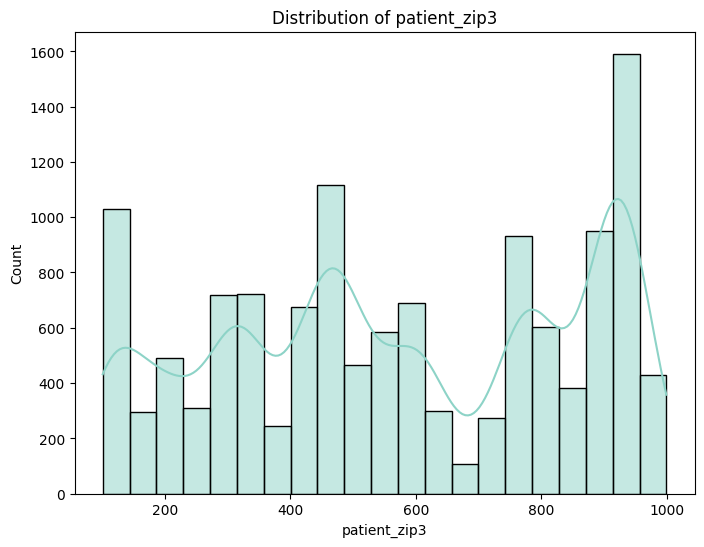

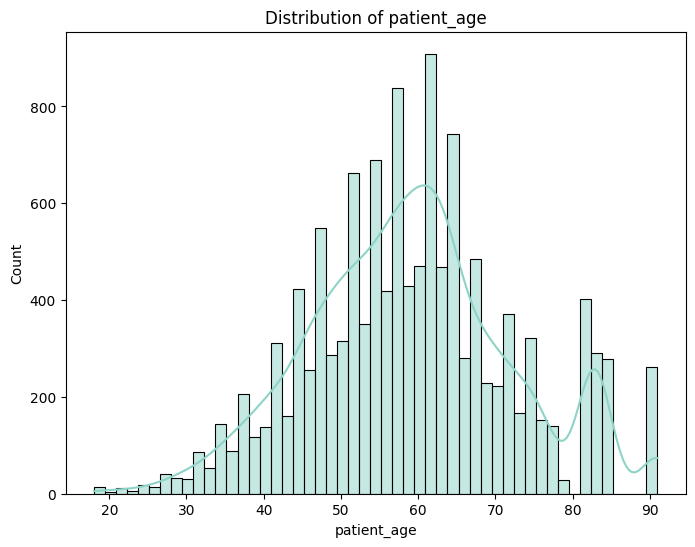

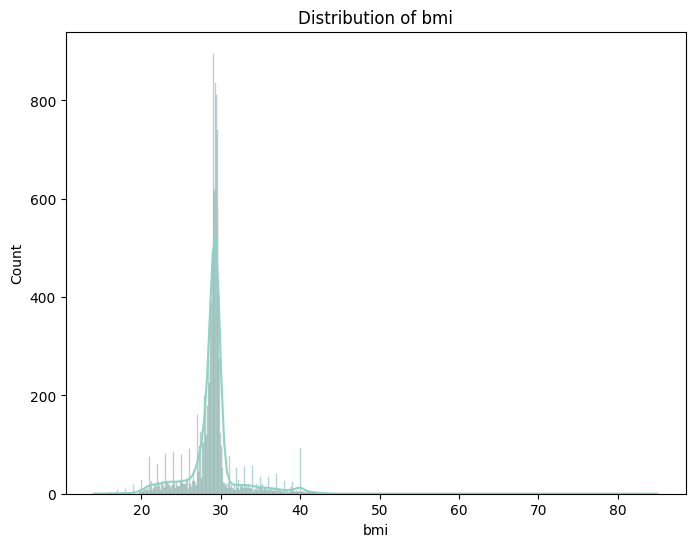

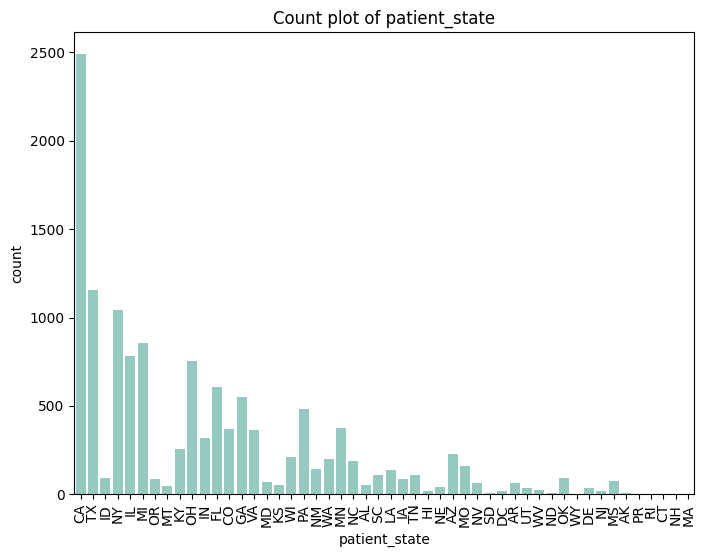

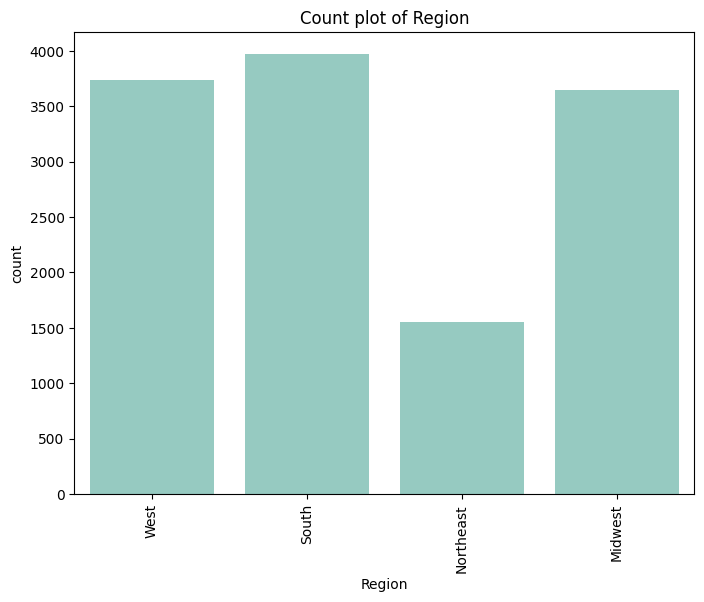

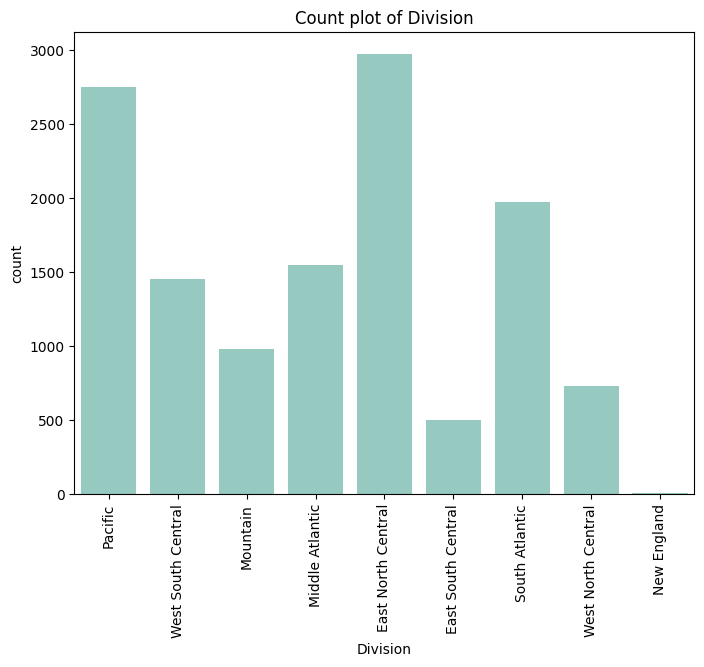

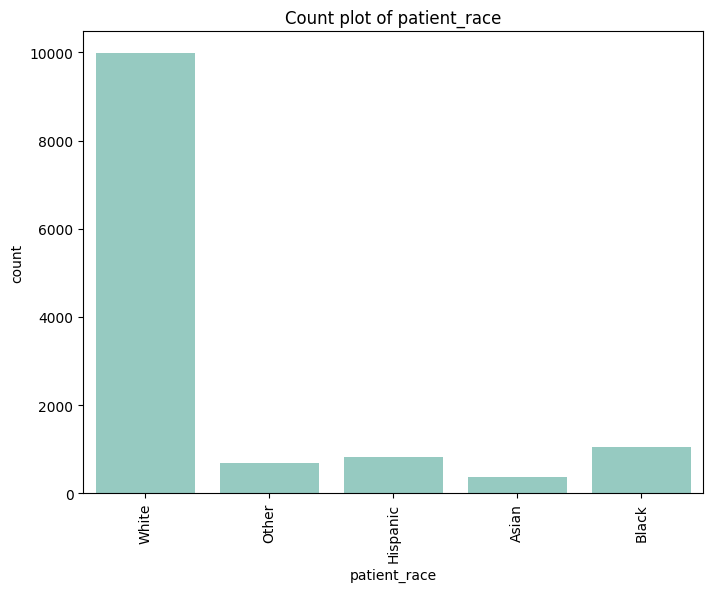

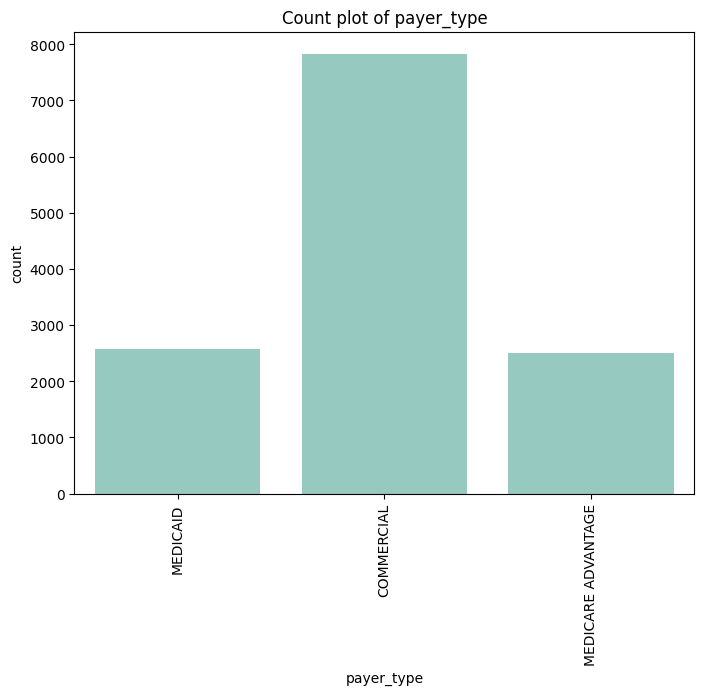

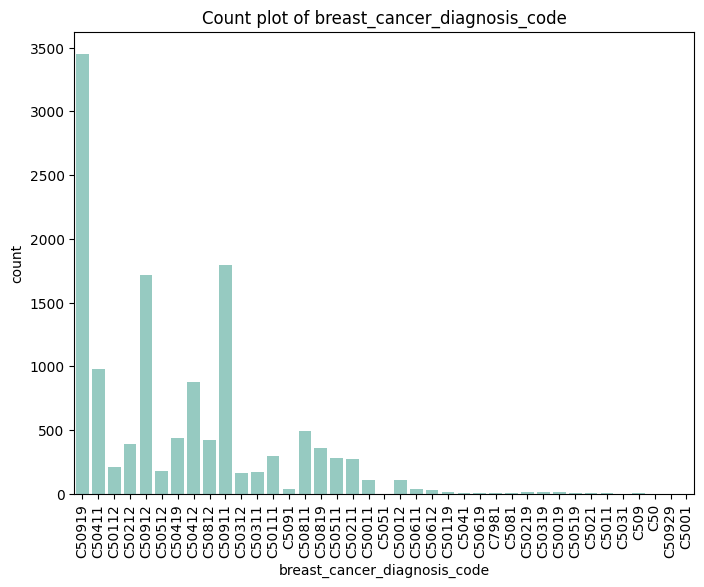

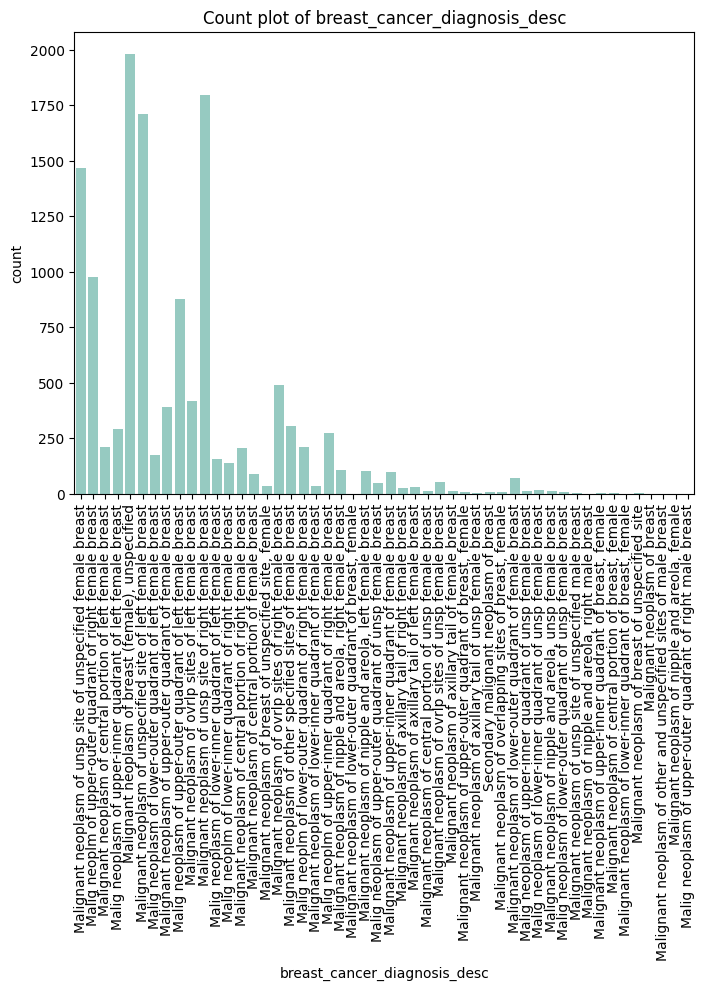

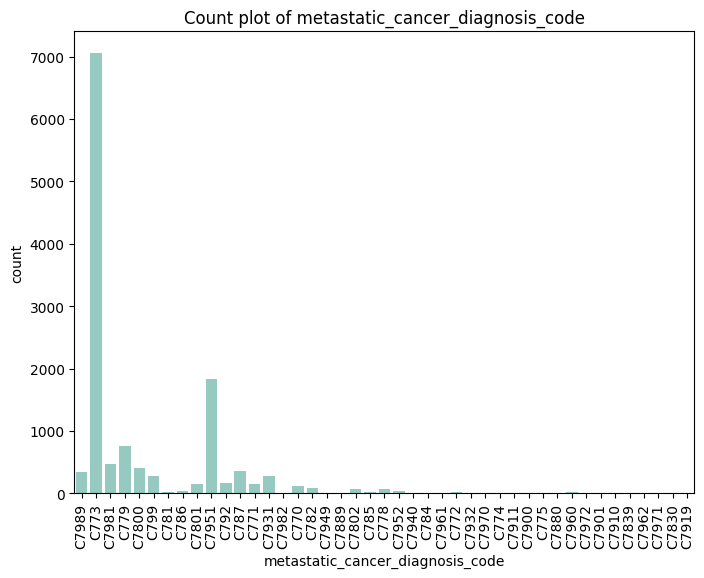

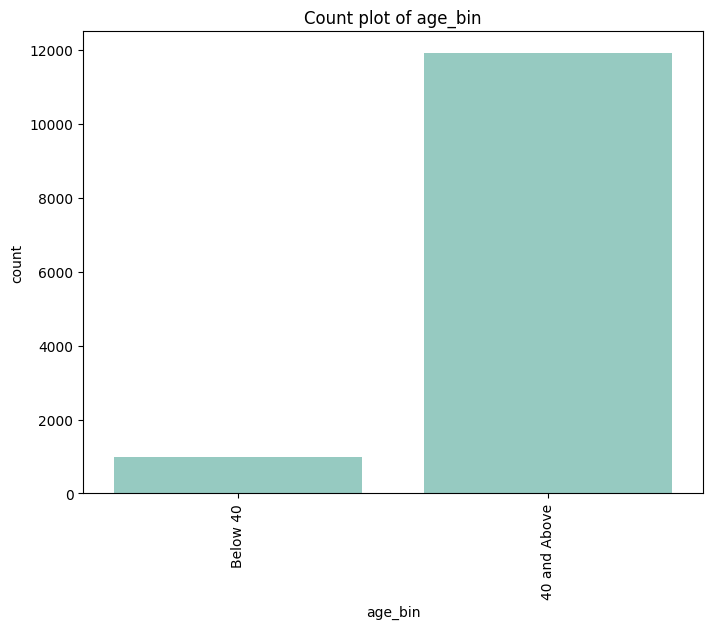

In [82]:

# separating numerical and object columns for visualisation

categorical_cols = patient_characteristics.select_dtypes(include=['object','category']).columns
numerical_cols = [col for col in patient_characteristics.columns if col not in categorical_cols]

# histplot for numerical variables
def plot_num_var(data, col):
    plt.figure(figsize=(8, 6))
    hist_plot = sns.histplot(data=data, x=col, kde=True)
    hist_plot.set_title(f"Distribution of {col}")
    plt.show()

# count plot for categorical variables
def plot_cat_var(data, col):
    plt.figure(figsize=(8, 6))
    count_plot = sns.countplot(data=data, x=col)
    count_plot.set_title(f"Count plot of {col}")
    plt.xticks(rotation=90)
    plt.show()

# Loop through and plot each variables
for col in numerical_cols:
    plot_num_var(patient_characteristics, col)

for col in categorical_cols:
    plot_cat_var(patient_characteristics, col)

# Age

<Axes: xlabel='DiagPeriodL90D', ylabel='patient_age'>

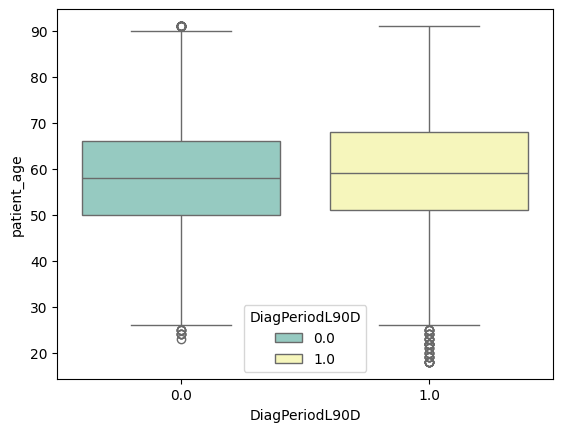

In [18]:
# age distribution by dignosis status ( 1- early, 0- late)
sns.boxplot(data=data, x='DiagPeriodL90D',y='patient_age',hue='DiagPeriodL90D')

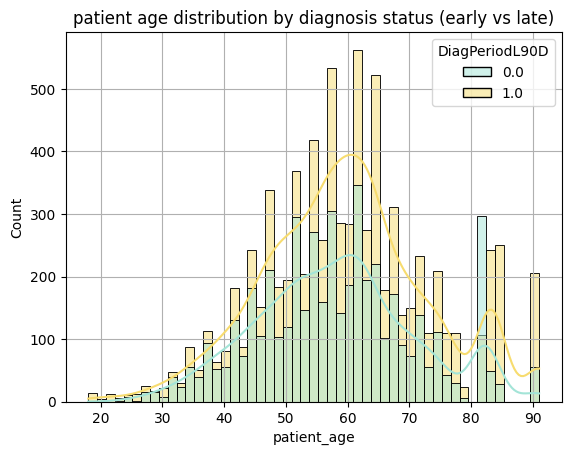

In [19]:
# visualise patient's age distribution by the diagnosis status
sns.histplot(data=data,x='patient_age',hue='DiagPeriodL90D',palette=['#a3e4d7','#f7dc6f'],kde=True)
plt.title("patient age distribution by diagnosis status (early vs late)")
plt.grid()


In [20]:
# early diagnosed
early_cases_age_features = data['patient_age'][data['DiagPeriodL90D']==1.0]
late_cases_age_features = data['patient_age'][data['DiagPeriodL90D']==0.0]
early_cases_age_mean = early_cases_age_features.mean()
early_cases_age_median = early_cases_age_features.median()

late_cases_age_mean = late_cases_age_features.mean()
late_cases_age_median = late_cases_age_features.median()

# creating dataframe
df = {
    'early diagnosed': [early_cases_age_mean, early_cases_age_median],
    'late diagnosed': [late_cases_age_mean, late_cases_age_median]
}

index = ['mean', 'median']

cases_age_stat = pd.DataFrame(df, index=index)
cases_age_stat

,early diagnosed,late diagnosed
mean,59.758561,58.226579
median,59.000000,58.000000


In [21]:
# mann-whitney test for statistical significance
from scipy.stats import mannwhitneyu
stat, p_value = mannwhitneyu(early_cases_age_features,late_cases_age_features)
stat, p_value

(20917377.5, 1.2524552359264362e-11)

the statistical tests suggest that the slight difference observed in mean and median age across two groups( classified on the basis of diagnosis status) may be signficant hence, could be useful factor for determing the timing of diagnosis for breast cancer patients.

# Insurance coverage type

In [22]:
# frequency by insurance coverage
patient_characteristics['payer_type'].value_counts()

payer_type
COMMERCIAL            7835
MEDICAID              2569
MEDICARE ADVANTAGE    2502
Name: count, dtype: int64

In [23]:
#diagnosis status by payer type
# Create a cross-tabulation (contingency table)
cross_tab = pd.crosstab(data['payer_type'], data['DiagPeriodL90D'], normalize='index') * 100
cross_tab

DiagPeriodL90D,0.0,1.0
payer_type,,
COMMERCIAL,37.651563,62.348437
MEDICAID,38.964578,61.035422
MEDICARE ADVANTAGE,35.771383,64.228617


In [24]:
from scipy.stats import chi2_contingency

chi2_contingency(cross_tab)

Chi2ContingencyResult(statistic=0.2199007393920649, pvalue=0.8958785969202804, dof=2, expected_freq=array([[37.46250802, 62.53749198],
       [37.46250802, 62.53749198],
       [37.46250802, 62.53749198]]))

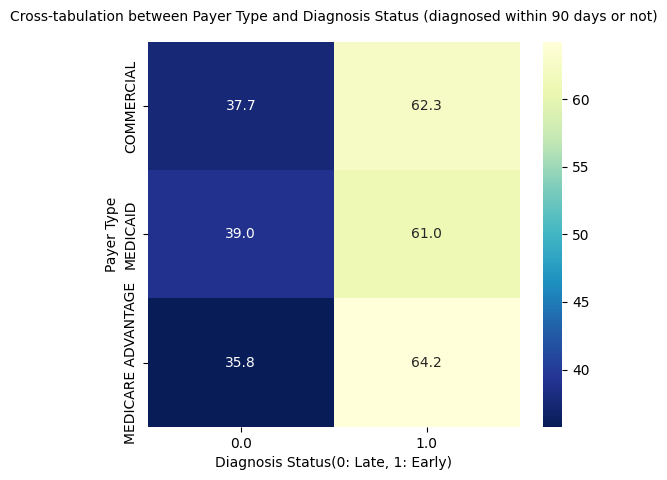

In [25]:
# Plotting heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu_r", fmt=".1f")
plt.title('Cross-tabulation between Payer Type and Diagnosis Status (diagnosed within 90 days or not)',pad=15,size=10)
plt.xlabel('Diagnosis Status(0: Late, 1: Early)')
plt.ylabel('Payer Type')
plt.show()

The distribution of early vs late diagnoses is relatively consistent across all payer types. While insurance type is undisputably important in terms of health care access, it may not be decisive factor in determining the timing of breast cancer diagnosis in this particular dataset.

* Bivariate analysis Age, payer type and diagnosis status

<Axes: xlabel='payer_type', ylabel='patient_age'>

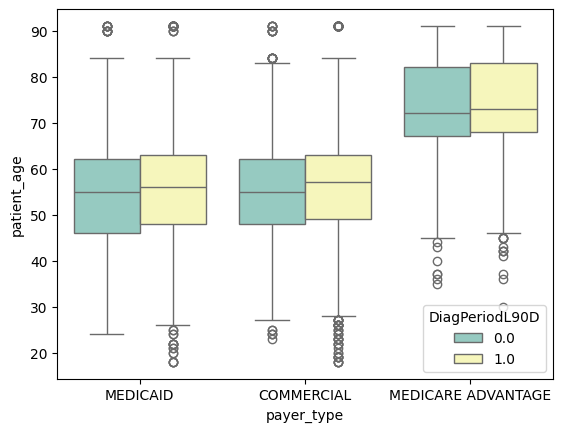

In [26]:
# patient_age distribution by payer type
sns.boxplot(data=data, x='payer_type',y='patient_age',hue='DiagPeriodL90D')

equal distribution of medicaid and commericial coverage across all ages, medicare advantage type skewed towards older age groups
early vs late diagnosis is similar for all age groups and payer types

# Race

In [27]:
cross_tab_race = pd.crosstab(data['patient_race'], data['DiagPeriodL90D'], normalize='index') * 100
cross_tab_race

DiagPeriodL90D,0.0,1.0
patient_race,,
Asian,36.986301,63.013699
Black,38.636364,61.363636
Hispanic,36.791315,63.208685
Other,37.335286,62.664714
White,37.531335,62.468665


In [28]:
from scipy.stats import chi2_contingency

chi2_contingency(cross_tab_race)

Chi2ContingencyResult(statistic=0.08861450710433443, pvalue=0.9990469512177946, dof=4, expected_freq=array([[37.45611999, 62.54388001],
       [37.45611999, 62.54388001],
       [37.45611999, 62.54388001],
       [37.45611999, 62.54388001],
       [37.45611999, 62.54388001]]))

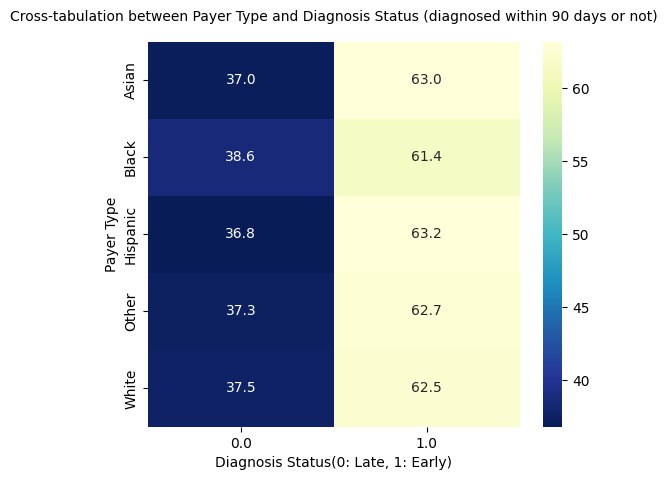

In [29]:
# Plotting heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cross_tab_race, annot=True, cmap="YlGnBu_r", fmt=".1f")
plt.title('Cross-tabulation between Payer Type and Diagnosis Status (diagnosed within 90 days or not)',pad=15,size=10)
plt.xlabel('Diagnosis Status(0: Late, 1: Early)')
plt.ylabel('Payer Type')
plt.show()

<Axes: xlabel='patient_race', ylabel='patient_age'>

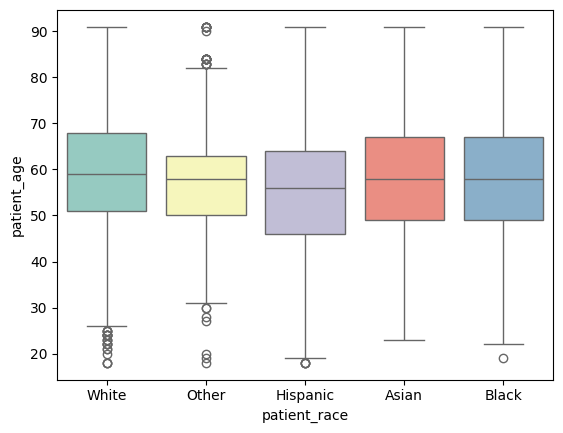

In [30]:
# how does the age_distribution look like by race
sns.boxplot(data=data,x='patient_race',y='patient_age',hue='patient_race')

<Axes: xlabel='patient_race', ylabel='count'>

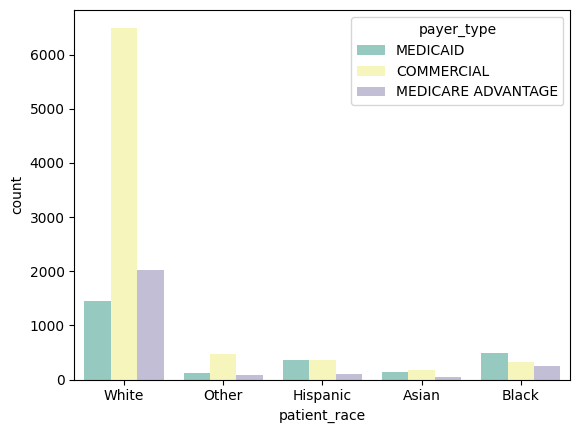

In [31]:
# what does the insurance coverage look like based on patient_race?
sns.countplot(data, x='patient_race',hue='payer_type')


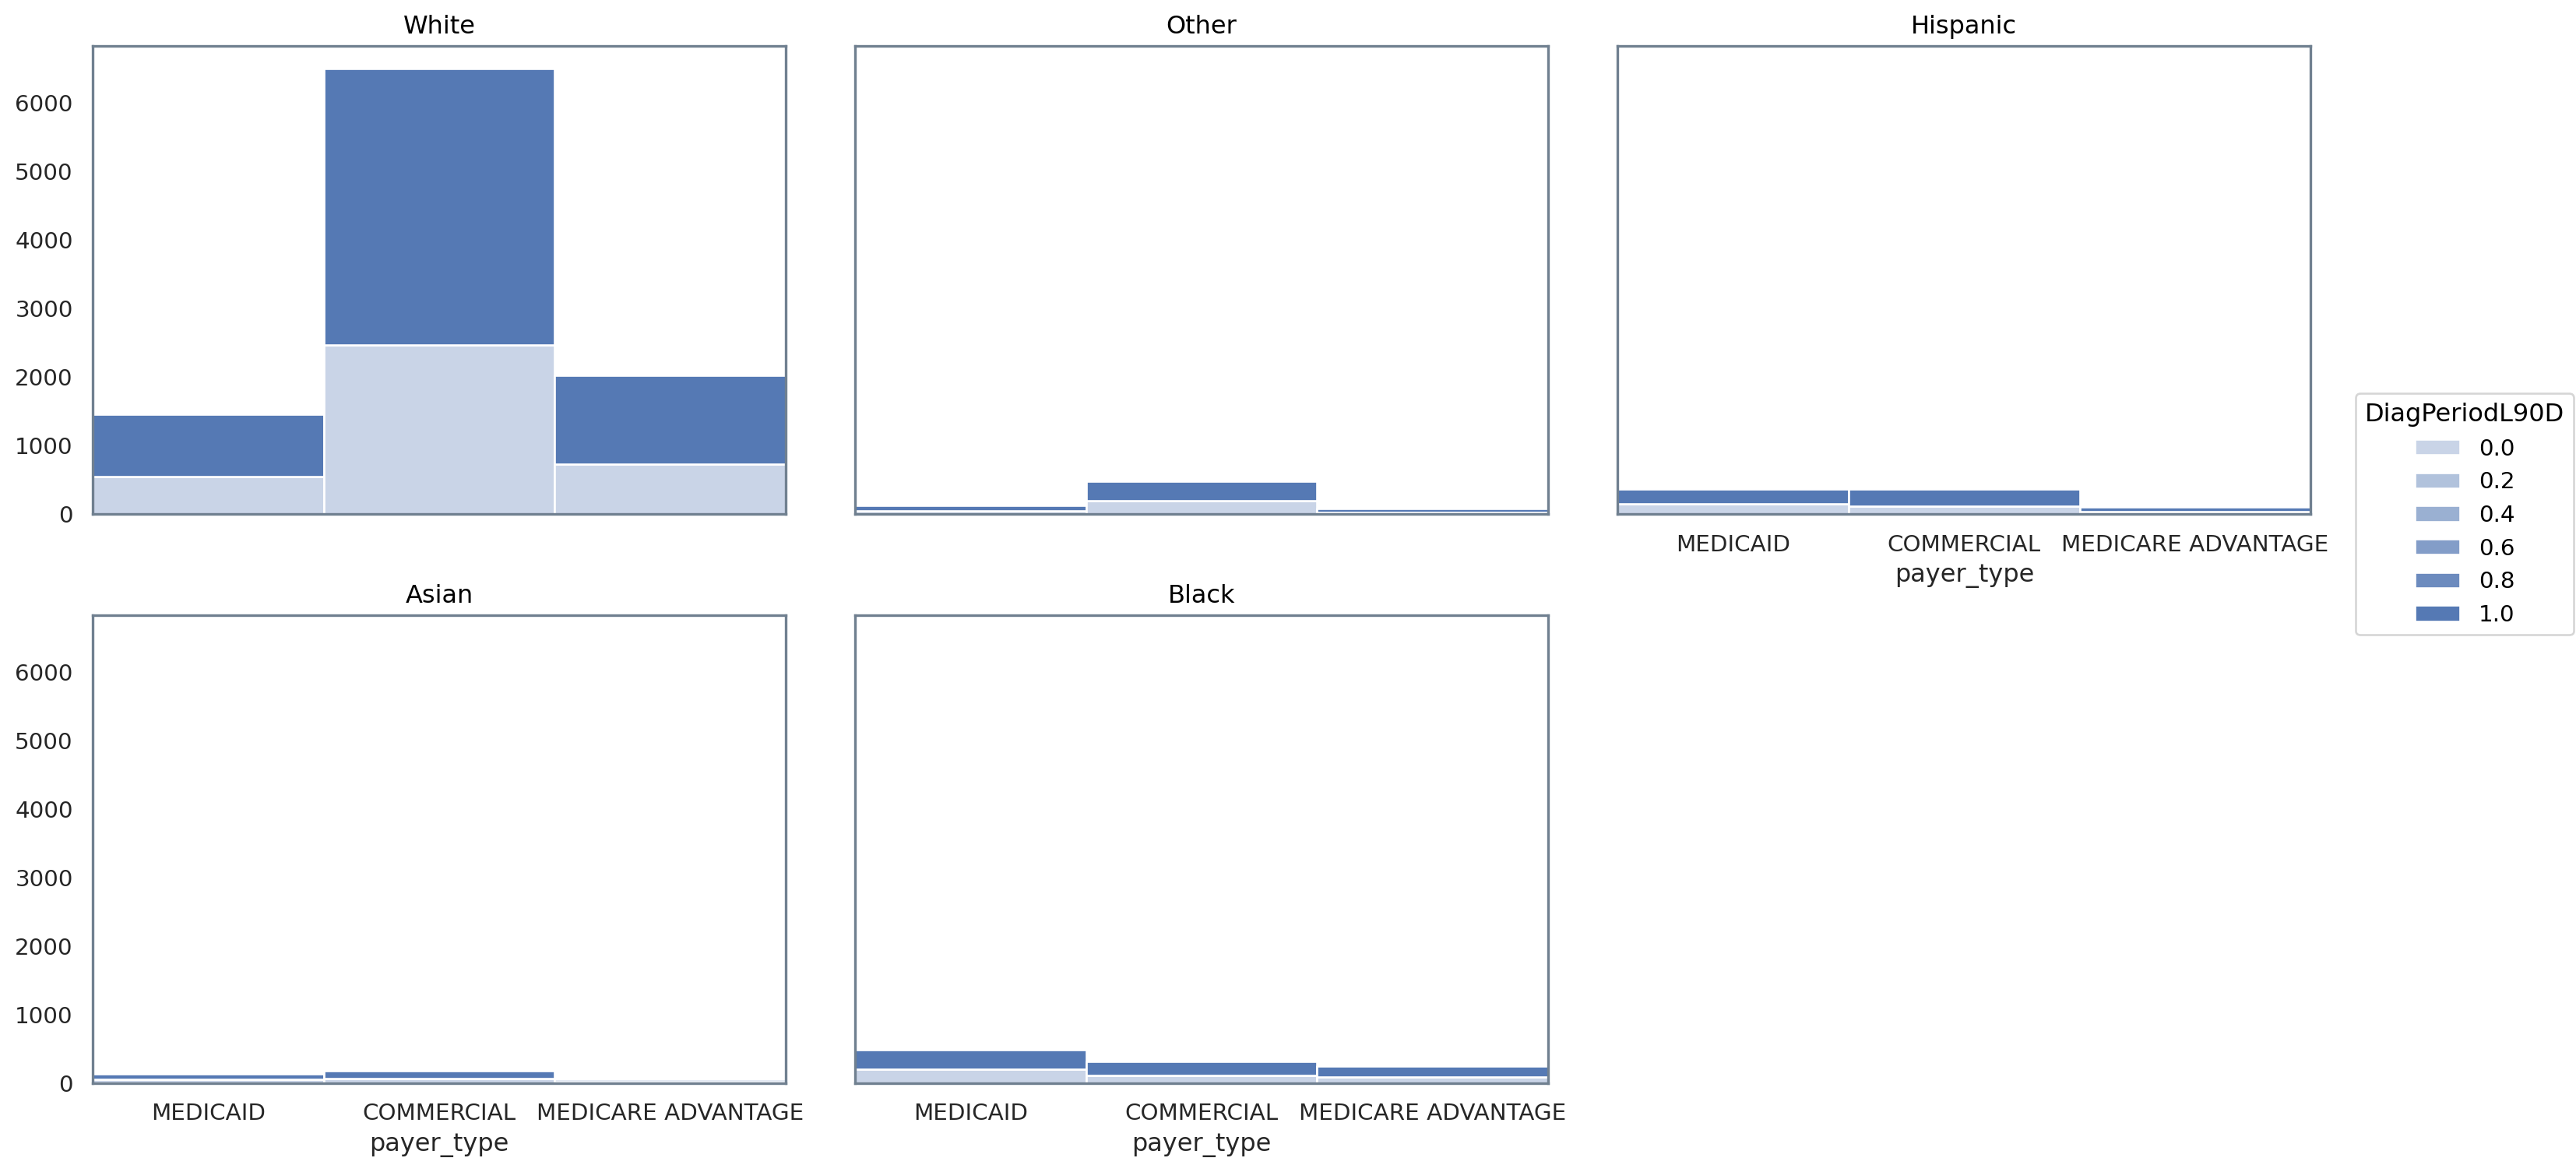

In [32]:
import seaborn.objects as so
(
    so.Plot(data, x="payer_type", alpha="DiagPeriodL90D")
    .facet("patient_race",wrap=3)
    .add(so.Bars(), so.Hist(binwidth=10), so.Stack())
    .layout(size=(16,8))
    .theme({"axes.facecolor": "w","axes.edgecolor": "slategray"})
)

# SES analysis


In [33]:
data.sort_values(by='patient_zip3',ascending=False)
data['patient_zip3']=data['patient_zip3'].astype('int64').astype("object")
data.head()

,patient_id,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,...,DiagPeriodL90D,patient_race,payer_type,patient_state,patient_gender,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,Region,Division
0,475714.0,924,84.0,29.578512,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,...,1.0,White,MEDICAID,CA,F,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,West,Pacific
1,349367.0,928,62.0,28.490000,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,...,1.0,White,COMMERCIAL,CA,F,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,West,Pacific
2,138632.0,760,43.0,38.090000,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,...,1.0,White,COMMERCIAL,TX,F,C50112,Malignant neoplasm of central portion of left ...,C773,South,West South Central
3,617843.0,926,45.0,27.343933,32795.32558,1896.220930,42.871429,10.071429,12.135714,12.538095,...,0.0,White,COMMERCIAL,CA,F,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,West,Pacific
4,817482.0,836,55.0,29.100482,10886.26000,116.886000,43.473469,10.824000,13.976000,9.492000,...,0.0,White,COMMERCIAL,ID,F,C50919,"Malignant neoplasm of breast (female), unspeci...",C773,West,Mountain


In [34]:
num_cases_by_state = data.groupby('patient_zip3')['patient_id'].count().reset_index()
num_cases_by_state = num_cases_by_state.sort_values(by=['patient_zip3']).reset_index(drop=True)
num_cases_by_state.shape

(739, 2)

In [35]:
# zip code level ses indicators
# socioeconomic indicators by state
zip_ses_data=data[['patient_zip3','income_household_median',
       'income_household_under_5', 'income_household_5_to_10',
       'income_household_10_to_15', 'income_household_15_to_20',
       'income_household_20_to_25', 'income_household_25_to_35',
       'income_household_35_to_50', 'income_household_50_to_75',
       'income_household_75_to_100', 'income_household_100_to_150',
       'income_household_150_over', 'income_household_six_figure', 'home_ownership', 'housing_units',
       'home_value', 'rent_median', 'rent_burden', 'education_less_highschool',
       'education_highschool', 'education_some_college', 'education_bachelors',
       'education_graduate', 'education_college_or_above',
       'education_stem_degree',
       'unemployment_rate','poverty']]

grouped_zip_ses_data=zip_ses_data.groupby('patient_zip3').mean(numeric_only=True)
grouped_zip_ses_data = grouped_zip_ses_data.sort_values(by='patient_zip3',ascending=True)
grouped_zip_ses_data.reset_index(inplace=True)
grouped_zip_ses_data.head()

,patient_zip3,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,...,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,unemployment_rate,poverty
0,101,113609.50000,0.750000,1.900000,1.350000,7.750000,1.100000,5.350000,1.700000,4.950000,...,31.900000,5.000000,16.650000,7.200000,38.350000,32.750000,71.100000,38.350000,2.500000,4.150000
1,103,90381.91667,4.125000,2.241667,3.583333,2.766667,2.458333,5.691667,8.141667,14.716667,...,34.941667,11.950000,29.733333,24.016667,20.716667,13.608333,34.325000,44.508333,5.233333,10.925000
2,104,50831.96000,6.024000,5.560000,8.628000,5.860000,5.424000,9.280000,12.164000,15.188000,...,41.364000,24.512000,27.484000,25.056000,14.236000,8.668000,22.904000,42.652000,10.856000,25.028000
3,105,147128.20690,1.970000,0.975000,1.503333,1.621667,2.046667,3.908333,5.835000,9.750000,...,32.793333,7.298387,15.125806,18.840323,28.788710,29.954839,58.743548,43.140984,7.064516,7.851613
4,106,111822.33330,1.433333,1.266667,2.566667,1.983333,3.916667,5.666667,7.850000,11.250000,...,32.860000,10.533333,17.950000,19.033333,25.650000,26.800000,52.450000,46.066667,5.783333,7.316667


In [36]:
# ses data summary statistics
grouped_zip_ses_data.describe().loc[['min','max']]

,patient_zip3,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,...,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,unemployment_rate,poverty
min,101.0,29222.0000,0.75,0.361538,1.015385,1.027778,1.10,2.65,1.700,4.950000,...,17.415789,0.000000,0.00,7.200000,2.465714,2.094118,7.048837,23.914706,0.823077,3.433333
max,999.0,164119.1765,19.62,11.872222,14.277778,12.918182,14.35,18.34,24.075,27.130303,...,78.940000,34.325424,53.96,50.133333,41.700000,51.840000,77.816667,73.000000,18.800000,38.347826


As per ESRI, composite index approach, direction of variables that tend to have opposite effect needs to reversed before using it to calculate index. That is, increasing unemployment rate would indicate decreasing SES, hence this variable needs to be reversed prior to calculating the SES index

In [37]:
# columns to reverse
no_reverse_vars = ['income_household_50_to_75', 'income_household_75_to_100','income_household_100_to_150', 'income_household_150_over',
       'income_household_six_figure','income_household_median','home_ownership','home_value','rent_burden','education_highschool',
       'education_some_college', 'education_bachelors',
       'education_graduate', 'education_college_or_above',
       'education_stem_degree']
reverse_vars = [col for col in grouped_zip_ses_data if col not in no_reverse_vars]

* Calculating composite index

In [38]:
# calculating the composite SES index using above variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))# min =0 and max=1
# transform the data
ses_df_scaled = pd.DataFrame(scaler.fit_transform(grouped_zip_ses_data[no_reverse_vars]),columns=no_reverse_vars)

#reverse the variables
def reverse_vars(col):
    col_series = col*(-1)
    series_min = col_series.min()
    series_max = col_series.max()
    normalized_series = (col_series - series_min) / (series_max - series_min)
    return normalized_series

# reversed_variables
ses_df_scaled['rev_income_household_5_to_10']=reverse_vars(grouped_zip_ses_data['income_household_5_to_10'])
ses_df_scaled['rev_income_household_10_to_15']=reverse_vars(grouped_zip_ses_data['income_household_10_to_15'])
ses_df_scaled['rev_income_household_15_to_20']=reverse_vars(grouped_zip_ses_data['income_household_15_to_20'])
ses_df_scaled['rev_income_household_20_to_25']=reverse_vars(grouped_zip_ses_data['income_household_20_to_25'])
ses_df_scaled['rev_income_household_25_to_35']=reverse_vars(grouped_zip_ses_data['income_household_25_to_35'])
ses_df_scaled['rev_income_household_35_to_50']=reverse_vars(grouped_zip_ses_data['income_household_35_to_50'])
ses_df_scaled['rev_housing_units']=reverse_vars(grouped_zip_ses_data['housing_units'])
ses_df_scaled['rev_rent_median'] =reverse_vars(grouped_zip_ses_data['rent_median'])
ses_df_scaled['rev_education_less_highschool'] = reverse_vars(grouped_zip_ses_data['education_less_highschool'])
ses_df_scaled['reversed_unemployment_rate']=reverse_vars(grouped_zip_ses_data['unemployment_rate'])
ses_df_scaled['reversed_poverty'] = reverse_vars(grouped_zip_ses_data['poverty'])


#ses_df_scaled.describe() # to check if all the variables are scaled

# apply weighting coefficients
coeff_list=[]
for i in range(len(ses_df_scaled)):
    coeff_list.append(1.0)
coefficient_dict = dict(zip(ses_df_scaled.columns,coeff_list))
# applying weighting coefficients ( ranges from 0 -1)
for colname, coeff in coefficient_dict.items():
    ses_df_scaled[colname]=ses_df_scaled[colname]*coeff

## composite index = average the scaled and percentage columns
grouped_zip_ses_data['composite_SES_index'] = ses_df_scaled.sum(axis=1)/len(ses_df_scaled.columns)

grouped_zip_ses_data.describe().loc[['min','mean','max']]

,patient_zip3,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,...,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,unemployment_rate,poverty,composite_SES_index
min,101.000000,29222.000000,0.750000,0.361538,1.015385,1.027778,1.100000,2.650000,1.700000,4.950000,...,0.000000,0.000000,7.200000,2.465714,2.094118,7.048837,23.914706,0.823077,3.433333,0.287001
mean,530.695535,65941.257845,3.310399,2.840188,4.639744,4.588056,4.672842,9.411292,12.727238,17.782825,...,11.689718,31.839965,29.848818,16.528320,10.093043,26.621363,42.099537,5.723658,14.158404,0.508607
max,999.000000,164119.176500,19.620000,11.872222,14.277778,12.918182,14.350000,18.340000,24.075000,27.130303,...,34.325424,53.960000,50.133333,41.700000,51.840000,77.816667,73.000000,18.800000,38.347826,0.679644


* SES index analysis - how do different variables contribute to calculated index?

(array([  4.,  11.,  27.,  70., 135., 182., 171.,  90.,  27.,  22.]),
 array([0.2870015 , 0.32626573, 0.36552997, 0.4047942 , 0.44405844,
        0.48332267, 0.5225869 , 0.56185114, 0.60111537, 0.64037961,
        0.67964384]),
 <BarContainer object of 10 artists>)

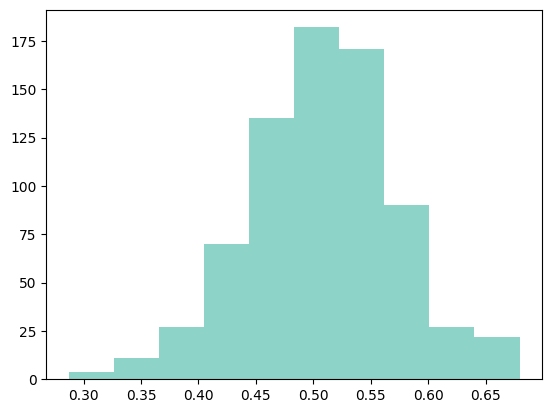

In [39]:
# analysing resulting index
# 1. distribution of index
plt.hist(grouped_zip_ses_data['composite_SES_index'])

<Axes: >

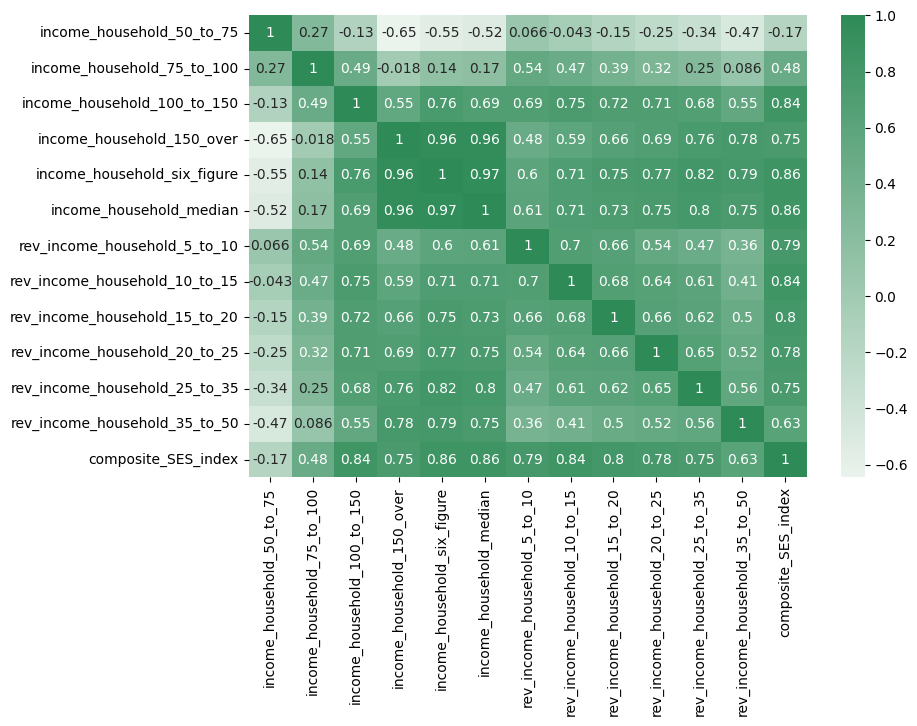

In [40]:
# 2. which variables are most important to the resulting index and whether any variables are not contributing meaningfully or
#  whether any single variable is driving most of the variation in theindex
target = 'composite_SES_index'

# combined df
combined_df = ses_df_scaled.copy()
combined_df[target] = ses_df_scaled.sum(axis=1)/len(ses_df_scaled.columns)

# income cols
income_cols = list(['income_household_50_to_75', 'income_household_75_to_100',
       'income_household_100_to_150', 'income_household_150_over',
       'income_household_six_figure', 'income_household_median','rev_income_household_5_to_10', 'rev_income_household_10_to_15',
       'rev_income_household_15_to_20', 'rev_income_household_20_to_25',
       'rev_income_household_25_to_35', 'rev_income_household_35_to_50'])
income_cols.append(target)

# houseownership cols
household_cols = list(['home_ownership', 'home_value', 'rent_burden','rev_housing_units', 'rev_rent_median'])
household_cols.append(target)
#print(household_cols)

# education cols
education_cols = list(['rev_education_less_highschool',
       'education_highschool', 'education_some_college', 'education_bachelors',
       'education_graduate', 'education_college_or_above',
       'education_stem_degree'])
education_cols.append(target)

colors=sns.light_palette("seagreen", as_cmap=True)
plt.figure(figsize=(9,6))
sns.heatmap(combined_df[income_cols].corr(),annot=True,cmap=colors)


<Axes: >

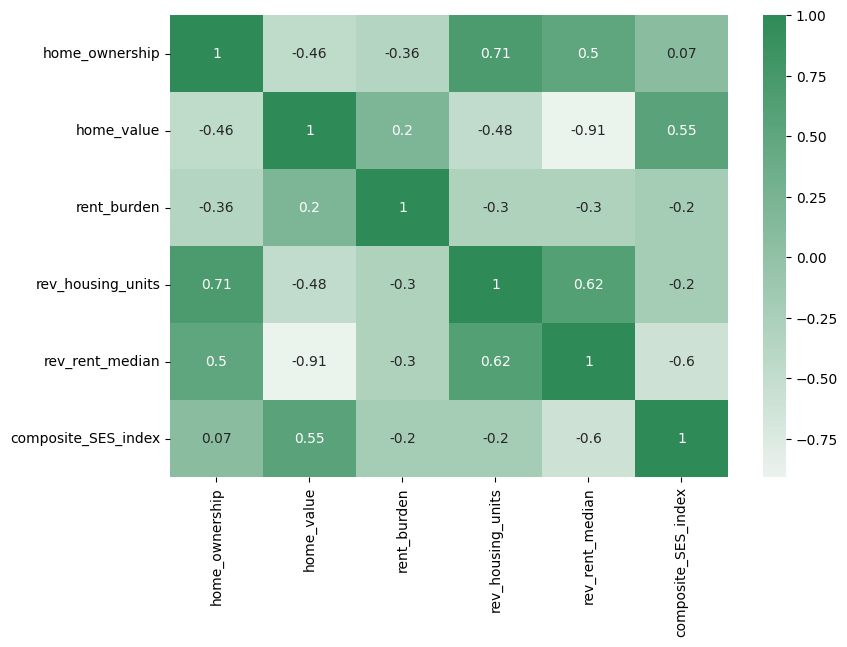

In [41]:
colors=sns.light_palette("seagreen", as_cmap=True)
plt.figure(figsize=(9,6))
sns.heatmap(combined_df[household_cols].corr(),annot=True,cmap=colors)

In [42]:
#colors=sns.light_palette("seagreen", as_cmap=True)
#plt.figure(figsize=(9,6))
#sns.heatmap(combined_df[education_cols].corr(),annot=True,cmap=colors)

In [43]:
#colors=sns.light_palette("seagreen", as_cmap=True)
#plt.figure(figsize=(8,5))
#sns.heatmap(combined_df[['reversed_unemployment_rate','reversed_poverty',target]].corr(),annot=True,cmap=colors)

In [44]:
# adding standard deviation and quartile column for the new composite index column
col_nm = 'composite_SES_index'

# creating name for the std and quartile column
std_col = f'{col_nm}_std'
quartile_col=f'{col_nm}_quartile'

# get the descriptive statistics
desc = grouped_zip_ses_data[col_nm].describe()

# calculate the std for each row
grouped_zip_ses_data[std_col]=(grouped_zip_ses_data[col_nm]-desc['mean'])/desc['std']

# assign the relevant quartile to each row
grouped_zip_ses_data.loc[grouped_zip_ses_data[col_nm]<=desc['25%'],quartile_col] = 1
grouped_zip_ses_data.loc[(grouped_zip_ses_data[col_nm]>desc['25%'])&(grouped_zip_ses_data[col_nm]<=desc['50%']),quartile_col] =2
grouped_zip_ses_data.loc[(grouped_zip_ses_data[col_nm] > desc['50%']) & (grouped_zip_ses_data[col_nm] <= desc['75%']), quartile_col] = 3
grouped_zip_ses_data.loc[grouped_zip_ses_data[col_nm] > desc['75%'], quartile_col] = 4

# typecasting the quaritle column to integer
grouped_zip_ses_data[quartile_col]=grouped_zip_ses_data[quartile_col].astype('int64')
grouped_zip_ses_data[['patient_zip3',col_nm,std_col,quartile_col]]

# adding corresponding state info to the dataframe
state_to_zip = dict(zip(data['patient_zip3'],data['patient_state']))

grouped_zip_ses_data['state']=grouped_zip_ses_data['patient_zip3'].map(state_to_zip)
grouped_zip_ses_data[['patient_zip3','state',col_nm,std_col,quartile_col]].head()


,patient_zip3,state,composite_SES_index,composite_SES_index_std,composite_SES_index_quartile
0,101,NY,0.622342,1.759040,4
1,103,NY,0.567861,0.916430,4
2,104,NY,0.367218,-2.186754,1
3,105,NY,0.649546,2.179784,4
4,106,NY,0.598762,1.394355,4


In [45]:
# sociodemographic factors between late-diagnosed vs early diagnosed status
early_diagnosis =data.loc[data['DiagPeriodL90D']==1]
late_diagnosis = data.loc[data['DiagPeriodL90D']==0]

# group by zip code
num_early_cases =  early_diagnosis.groupby('patient_zip3')['patient_id'].count().reset_index(name='early_cases_count')
num_late_cases = late_diagnosis.groupby('patient_zip3')['patient_id'].count().reset_index(name='late_cases_count')

# merge the dataframes
merged_df = grouped_zip_ses_data.merge(num_early_cases,on='patient_zip3',how='outer').fillna(0)
merged_df = merged_df.merge(num_late_cases,on='patient_zip3',how='outer').fillna(0)
merged_df[['early_cases_count','late_cases_count']] = merged_df[['early_cases_count','late_cases_count']].astype('int64')



In [46]:
# declaring the column names
early_cases = 'early_cases_count'
late_cases = 'late_cases_count'

# calculate the total
total_cases_per_zip_level = merged_df[early_cases]+merged_df[late_cases]

# create percentage early diagnosis
merged_df['per_early_cases']=((merged_df[early_cases]/total_cases_per_zip_level)*100).round(2)
merged_df['per_late_cases']=100-merged_df['per_early_cases']

merged_df.describe().loc[['min','mean','max']]

,patient_zip3,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,...,education_stem_degree,unemployment_rate,poverty,composite_SES_index,composite_SES_index_std,composite_SES_index_quartile,early_cases_count,late_cases_count,per_early_cases,per_late_cases
min,101.000000,29222.000000,0.750000,0.361538,1.015385,1.027778,1.100000,2.650000,1.700000,4.950000,...,23.914706,0.823077,3.433333,0.287001,-3.427407e+00,1.000000,0.000000,0.00000,0.000000,0.000000
mean,530.695535,65941.257845,3.310399,2.840188,4.639744,4.588056,4.672842,9.411292,12.727238,17.782825,...,42.099537,5.723658,14.158404,0.508607,1.442238e-16,2.499323,10.906631,6.55751,62.474668,37.525332
max,999.000000,164119.176500,19.620000,11.872222,14.277778,12.918182,14.350000,18.340000,24.075000,27.130303,...,73.000000,18.800000,38.347826,0.679644,2.645291e+00,4.000000,150.000000,89.00000,100.000000,100.000000


In [47]:
# zip to index quartile mapping
zip_to_SES_index = dict(zip(merged_df['patient_zip3'],merged_df['composite_SES_index']))
zip_to_SES_quantile = dict(zip(merged_df['patient_zip3'],merged_df['composite_SES_index_quartile']))

# diagnosis status by index
patient_diag_by_SES = data[['patient_zip3','patient_state','DiagPeriodL90D','health_uninsured']]
patient_diag_by_SES['composite_SES_index']=patient_diag_by_SES['patient_zip3'].map(zip_to_SES_index)
patient_diag_by_SES['composite_SES_index_quartile'] = patient_diag_by_SES['patient_zip3'].map(zip_to_SES_quantile)
patient_diag_by_SES['patient_age']=data['patient_age']


# Grouping data by state and calculating the mean and median SES index for early and late diagnosis cases
state_grouped = merged_df.groupby('state')

early_cases_state = state_grouped.apply(lambda x: x[x['per_early_cases'] > x['per_late_cases']]['composite_SES_index'])
late_cases_state = state_grouped.apply(lambda x: x[x['per_late_cases'] > x['per_early_cases']]['composite_SES_index'])

early_mean_state = early_cases_state.mean()
early_median_state = early_cases_state.median()
late_mean_state = late_cases_state.mean()
late_median_state = late_cases_state.median()

early_mean_state, early_median_state, late_mean_state, late_median_state

(0.5126861040539104, 0.514215720457307, 0.4990437988070811, 0.5115475634714629)

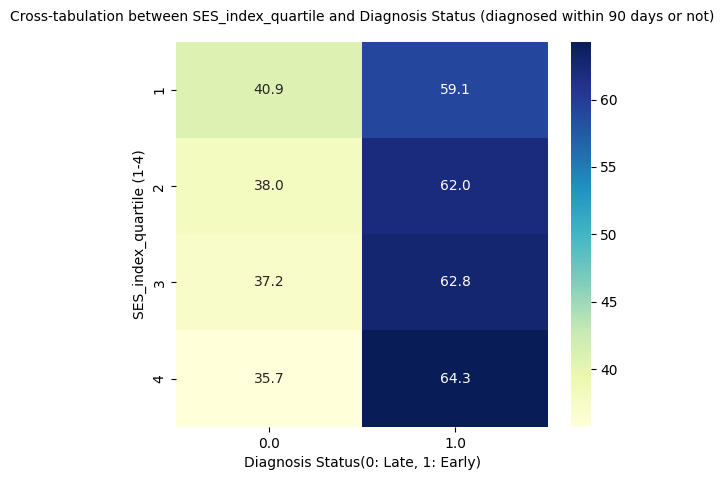

In [48]:
# chi square test for independence
# Create a cross-tabulation (contingency table) for SES_index_quantile
cross_tab_SES = pd.crosstab(patient_diag_by_SES['composite_SES_index_quartile'], patient_diag_by_SES['DiagPeriodL90D'], normalize='index') * 100

from scipy.stats import chi2_contingency

chi2_contingency(cross_tab_SES)

# Plotting heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cross_tab_SES, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title('Cross-tabulation between SES_index_quartile and Diagnosis Status (diagnosed within 90 days or not)',pad=15,size=10)
plt.xlabel('Diagnosis Status(0: Late, 1: Early)')
plt.ylabel('SES_index_quartile (1-4)')
plt.show()

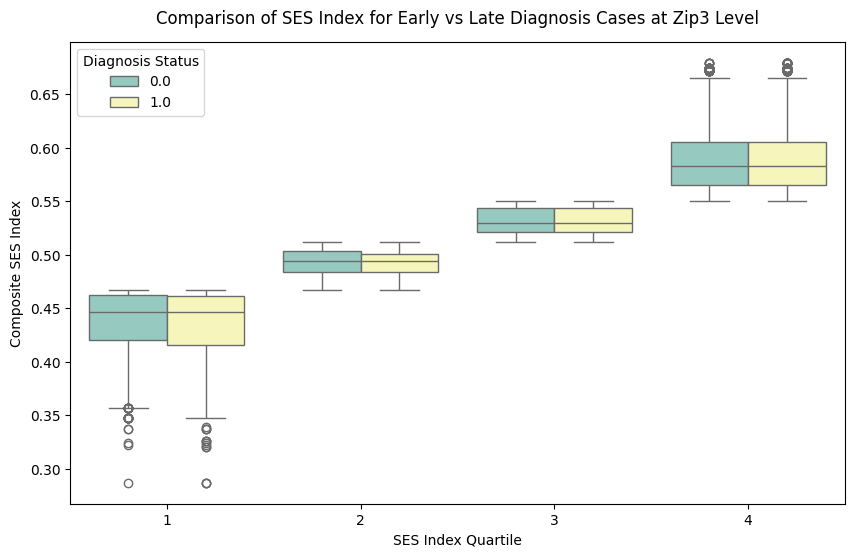

In [49]:
# Box plots for Zip3 level
plt.figure(figsize=(10, 6))
sns.boxplot(data=patient_diag_by_SES, x='composite_SES_index_quartile', y='composite_SES_index', hue='DiagPeriodL90D')
plt.title('Comparison of SES Index for Early vs Late Diagnosis Cases at Zip3 Level',pad=13)
plt.xlabel('SES Index Quartile')
plt.ylabel('Composite SES Index')
plt.legend(title='Diagnosis Status')
plt.show()


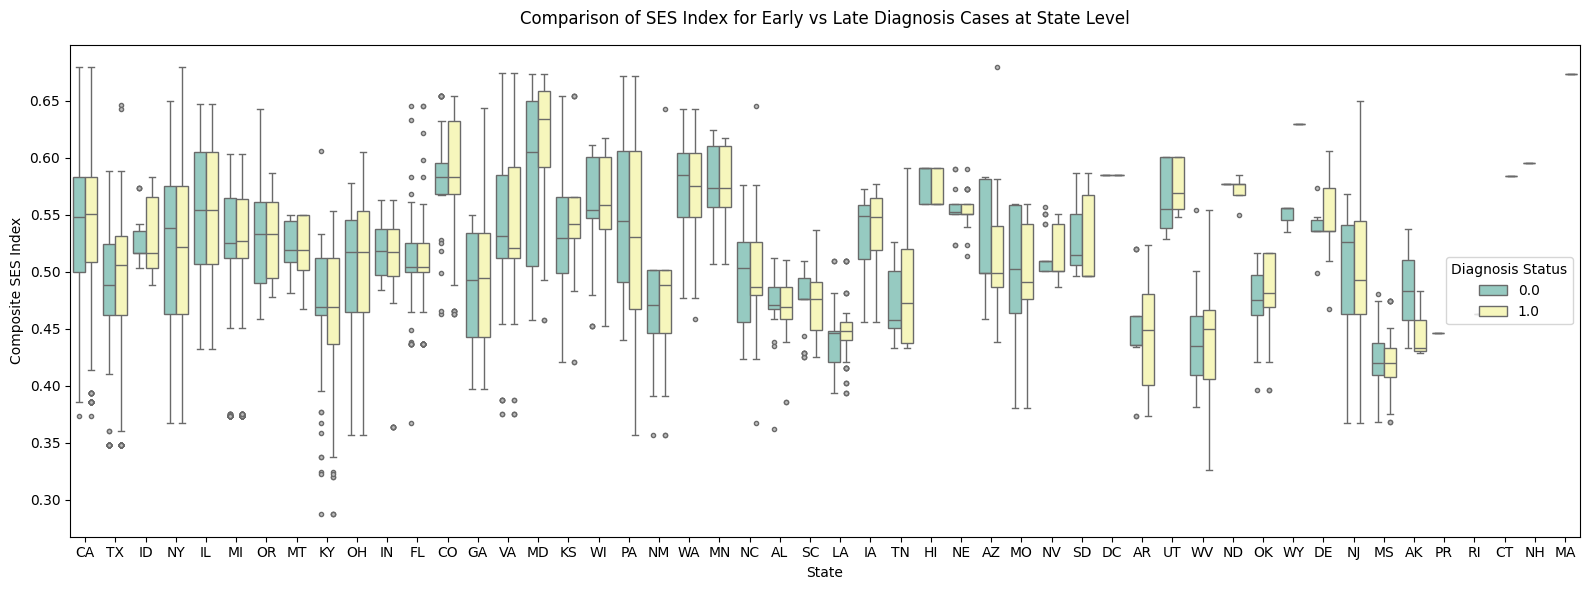

In [50]:
# Box plots for state level
plt.figure(figsize=(16, 6))
flierprops = dict(markerfacecolor='0.75', markersize=3,
              linestyle='none')
sns.boxplot(data= patient_diag_by_SES, x='patient_state', y='composite_SES_index', hue='DiagPeriodL90D',flierprops=flierprops)
plt.title('Comparison of SES Index for Early vs Late Diagnosis Cases at State Level',pad=15)
plt.xlabel('State')
plt.ylabel('Composite SES Index')
plt.legend(title='Diagnosis Status',loc='right')
plt.tight_layout()
plt.show()

# Relation between SES index of the region and health_uninsured rate

In [51]:
patient_diag_by_SES.groupby('composite_SES_index_quartile')['health_uninsured'].mean()
patient_diag_by_SES.groupby('composite_SES_index_quartile')['health_uninsured'].median()

composite_SES_index_quartile
1    9.239062
2    8.993182
3    7.677778
4    5.497143
Name: health_uninsured, dtype: float64

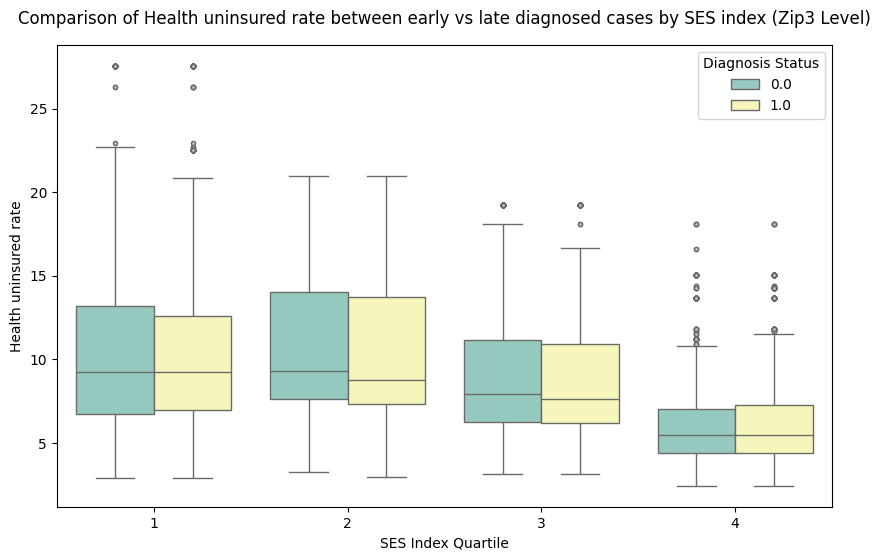

In [52]:
# Box plots for Zip3 level
plt.figure(figsize=(10, 6))
flierprops = dict(markerfacecolor='0.75', markersize=3,
              linestyle='none')
sns.boxplot(data=patient_diag_by_SES, x='composite_SES_index_quartile', y='health_uninsured', hue='DiagPeriodL90D',flierprops=flierprops)
plt.title('Comparison of Health uninsured rate between early vs late diagnosed cases by SES index (Zip3 Level)',pad=15)
plt.xlabel('SES Index Quartile')
plt.ylabel('Health uninsured rate')
plt.legend(title='Diagnosis Status')
plt.show()

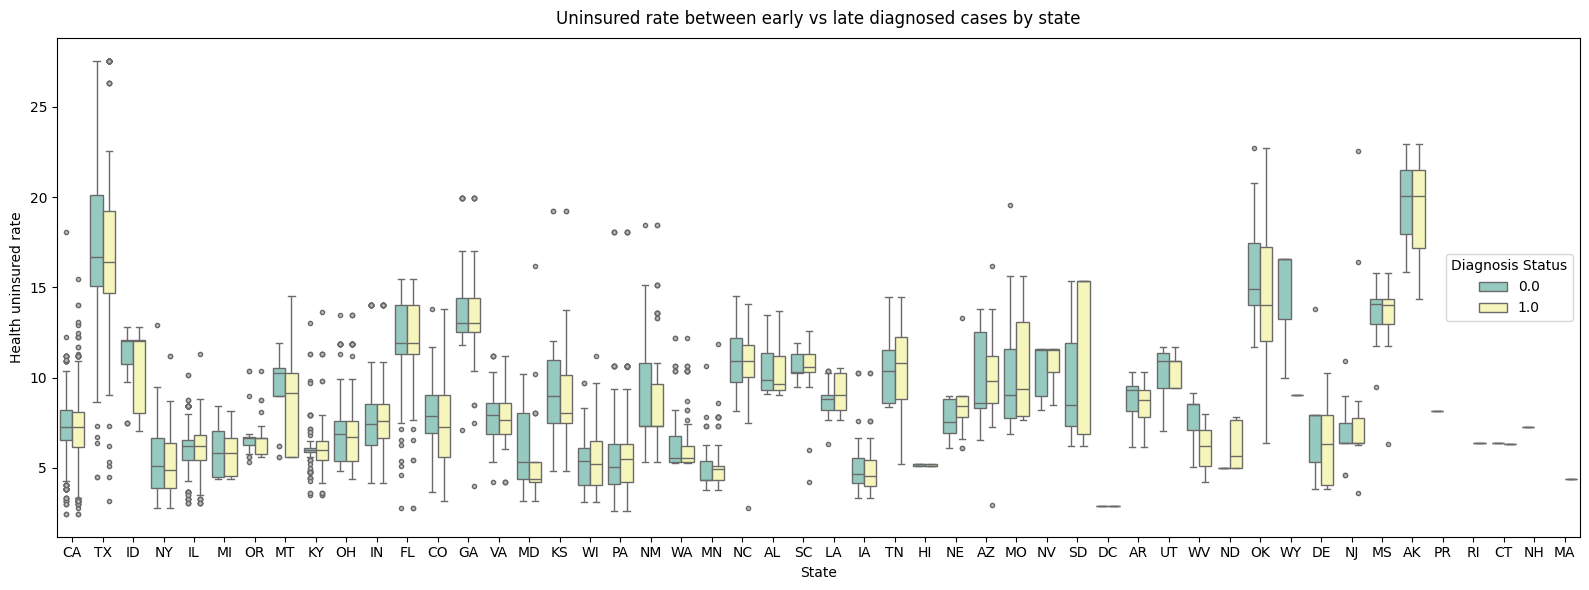

In [53]:
# Box plots for state level
plt.figure(figsize=(16, 6))
flierprops = dict(markerfacecolor='0.75', markersize=3,
              linestyle='none')
sns.boxplot(data= patient_diag_by_SES, x='patient_state', y='health_uninsured', hue='DiagPeriodL90D',flierprops=flierprops)

plt.title('Uninsured rate between early vs late diagnosed cases by state',pad=10)
plt.xlabel('State')
plt.ylabel('Health uninsured rate')
plt.legend(title='Diagnosis Status',loc='right')
plt.tight_layout()
plt.show()

In [54]:
# importing shape files
import geopandas as gpd

US_shapes = gpd.read_file("/content/drive/MyDrive/filtered_shape_files/filtered_shapefile.shp")
rem_shapes= gpd.read_file("/content/drive/MyDrive/rem_shape_files/rem_shapefile.shp")
state_shapes = gpd.read_file("/content/drive/MyDrive/state_shapefiles/tl_2021_us_state.shp")
new_shapes=pd.concat([US_shapes, rem_shapes])

In [55]:
# ses data to plot
#ses_plot_data = merged_df[['patient_zip3','composite_SES_index','composite_SES_index_quartile', 'state', 'early_cases_count',
       #'late_cases_count', 'per_early_cases', 'per_late_cases']]
#ses_plot_data['patient_zip3']= ses_plot_data['patient_zip3'].astype("str")

# merge two data based on shared variable
#ses_plot_shapes = ses_plot_data.merge(new_shapes,left_on="patient_zip3",right_on='zip3_codes',how='right')
#ses_plot_shapes
# converting the data into geodataframe
#ses_plot_data = gpd.GeoDataFrame(ses_plot_shapes,geometry='geometry')
#ses_plot_data.shape

In [56]:
# Extract centroids from geometries
#ses_plot_data['centroid'] = ses_plot_data['geometry'].centroid
#ses_plot_data['longitude'] = ses_plot_data['centroid'].x
#ses_plot_data['latitude'] = ses_plot_data['centroid'].y

In [57]:
#fig, ax = plt.subplots(1, 1, figsize=(16, 8))
#ses_plot_data.plot(column='composite_SES_index', ax=ax,legend=True,
 #                  legend_kwds={'label': "SES index",'orientation': "vertical","shrink":0.3},
 #                  missing_kwds={"color": "lightgrey" },
 #                  cmap='BuGn')

# Add state boundaries
#state_shapes.boundary.plot(ax=ax, edgecolor='grey', linewidth=0.5)

#sizes = ses_plot_data['early_cases_count'] / ses_plot_data['early_cases_count'].max() * 100  # Normalize sizes for better visualization

#ax.scatter(ses_plot_data['longitude'], ses_plot_data['latitude'], s=sizes,# Size of points
#     c='red',  # Color of points
 #          alpha=0.6,  # Transparency
  #         edgecolor='k',  # Edge color
   #        linewidth=0.5,  # Edge thickness
    #       label='Number of early cases')

#ax.set_axis_off()
#ax.set_xlim(-170, -50)
#ax.set_ylim(18,70)
#plt.title('Choropleth Map of SES by ZIP Code',pad=15)
#plt.show()


# Air pollutants and breast cancer
- What environmental factors have been associated with the breast cancer incidence?
- There are three variables - Nitrogen dioxide, ozone and particulate matter 25 ( or PM25) cited to be associated with various health problems including breast cancer.


In [58]:
env_indicators=data[['patient_zip3','patient_state','Ozone', 'PM25', 'N02']]

# grouping the data on a zip level
zip_env_indicators = env_indicators.groupby('patient_zip3').mean(numeric_only=True)
zip_env_indicators=zip_env_indicators.reset_index()

# number of cases by zip level
count_data = data.groupby('patient_zip3')['patient_id'].count().reset_index()
count_data.rename(columns={'patient_id':'num_cases'},inplace=True)
count_data.reset_index(drop=True)

# map zip to corresponding state
state_to_zip = dict(zip(data['patient_zip3'],data['patient_state']))

# environmental factors
environment_data = zip_env_indicators.merge(count_data,on='patient_zip3',how='outer')
environment_data['state']=environment_data['patient_zip3'].map(state_to_zip)
#environment_data.rename(columns={'patient_zip3':'3dig_zip'},inplace=True)
environment_data.head()

,patient_zip3,Ozone,PM25,N02,num_cases,state
0,101,39.476275,4.178836,4.131900,2,NY
1,103,38.718935,7.299229,22.112395,35,NY
2,104,36.555194,7.426677,29.089314,113,NY
3,105,39.286219,6.634648,20.973690,33,NY
4,106,39.302792,6.642263,19.413762,5,NY


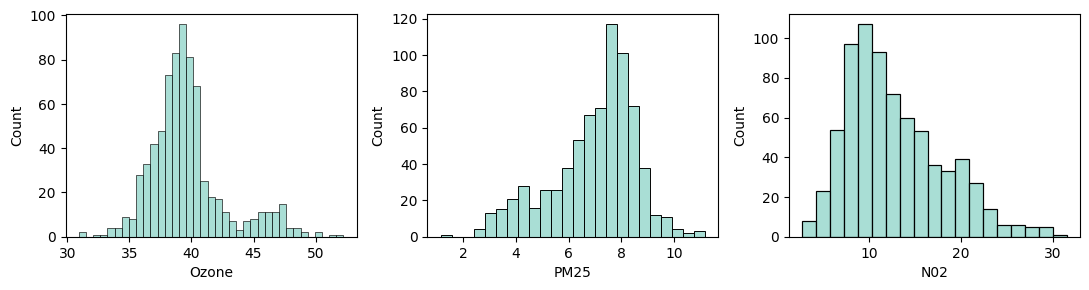

In [59]:
# visualise the distribution of three variables
fig, axes = plt.subplots(1,3, figsize=(11, 3))
sns.histplot(environment_data['Ozone'],ax=axes[0])
sns.histplot(environment_data['PM25'],ax=axes[1])
sns.histplot(environment_data['N02'],ax=axes[2])

plt.tight_layout()

In [60]:
## calculating the composite environmental index using above variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))# min =0 and max=1
# transform the data
env_df_scaled = pd.DataFrame(scaler.fit_transform(environment_data[['Ozone', 'PM25', 'N02']]),columns=['Ozone', 'PM25', 'N02'])

# apply weighting coefficients
coeff_list=[]
for i in range(len(env_df_scaled)):
    coeff_list.append(1.0)
coefficient_dict = dict(zip(env_df_scaled.columns,coeff_list))
# applying weighting coefficients ( ranges from 0 -1)
for colname, coeff in coefficient_dict.items():
    env_df_scaled[colname]=env_df_scaled[colname]*coeff

## composite index = average the scaled and percentage columns
environment_data['composite_air_pollution_index'] = env_df_scaled.sum(axis=1)/len(env_df_scaled.columns)

# adding standard deviation and quartile column for the new composite index column
col_nam = 'composite_air_pollution_index'

# creating name for the std and quartile column
std_col = f'{col_nam}_std'
quartile_col=f'{col_nam}_quartile'

# get the descriptive statistics
e_desc =environment_data[col_nam].describe()

# calculate the std for each row
environment_data[std_col]=(environment_data[col_nam]-e_desc['mean'])/e_desc['std']

# assign the relevant quartile to each row
environment_data.loc[environment_data[col_nam]<=e_desc['25%'],quartile_col] = 1
environment_data.loc[(environment_data[col_nam]> e_desc['25%'])&(environment_data[col_nam]<=e_desc['50%']),quartile_col] =2
environment_data.loc[(environment_data[col_nam] > e_desc['50%']) & (environment_data[col_nam] <= e_desc['75%']), quartile_col] = 3
environment_data.loc[environment_data[col_nam] > e_desc['75%'], quartile_col] = 4

# typecasting the quartile column to integer
environment_data[quartile_col]=environment_data[quartile_col].astype('int64')

environment_data['composite_SES_index']=merged_df['composite_SES_index']
environment_data.head()

,patient_zip3,Ozone,PM25,N02,num_cases,state,composite_air_pollution_index,composite_air_pollution_index_std,composite_air_pollution_index_quartile,composite_SES_index
0,101,39.476275,4.178836,4.131900,2,NY,0.250316,-2.011610,1,0.622342
1,103,38.718935,7.299229,22.112395,35,NY,0.550769,1.077849,4,0.567861
2,104,36.555194,7.426677,29.089314,113,NY,0.602052,1.605167,4,0.367218
3,105,39.286219,6.634648,20.973690,33,NY,0.524336,0.806048,4,0.649546
4,106,39.302792,6.642263,19.413762,5,NY,0.506759,0.625311,4,0.598762


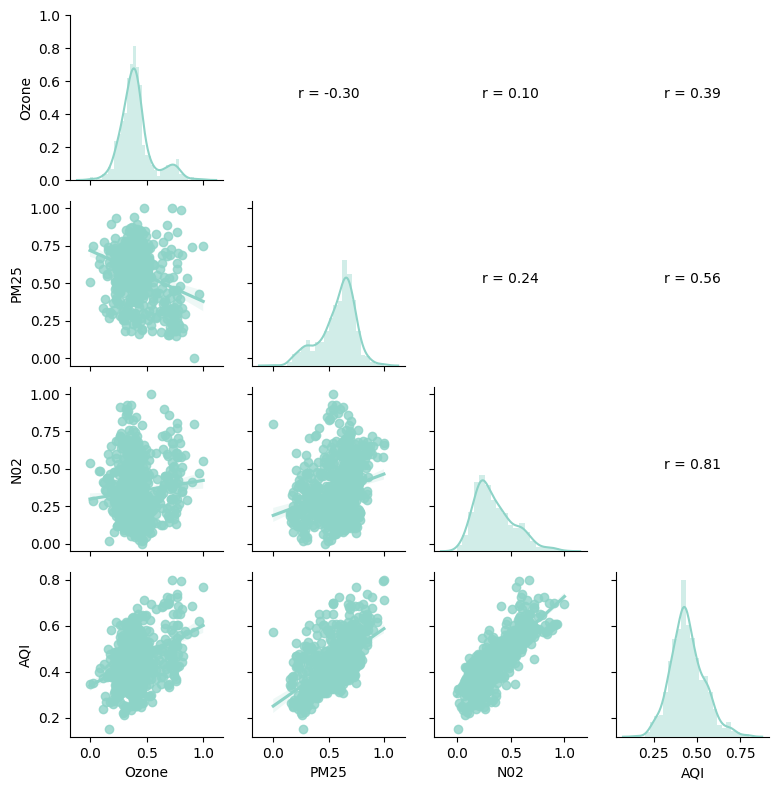

In [61]:
# evaluate calculated index and it's relationship with preprocessed variables (ESRI recom)
test_df = env_df_scaled.copy()

test_df['AQI']=environment_data['composite_air_pollution_index']

from scipy.stats import pearsonr
def reg_coef(x,y,label=None,color=None):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.set_axis_off()
g = sns.PairGrid(test_df,height=2.0)
g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef)

NO2 and PM25 contribute relatively higher weight in calculating composite index

Text(0, 0.5, 'Number of cases')

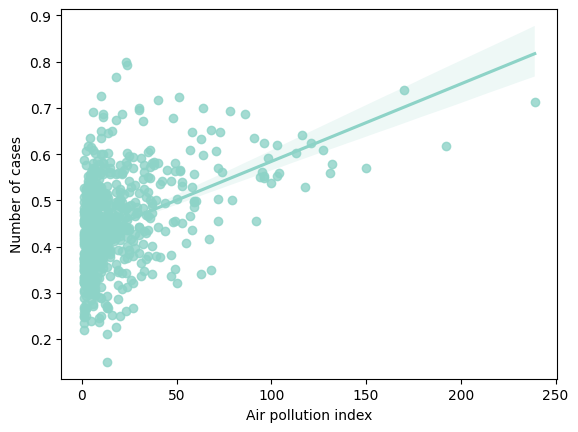

In [62]:
# correlation between num_cases and air pollution index
# Calculate Pearson correlation
pearson_corr, _ = pearsonr(environment_data['composite_air_pollution_index'], environment_data['num_cases'])
#print(f'Pearson correlation: {pearson_corr:.2f}')

# scatterplot

rplot=sns.regplot(data=environment_data,y='composite_air_pollution_index',x='num_cases')
plt.xlabel("Air pollution index")
plt.ylabel("Number of cases")
#plt.savefig(f"{IMAGE_DIR}/corr_env.png")

In [63]:
# Calculate the mean and median number of cases for each quartile
quartile_summary = environment_data.groupby('composite_air_pollution_index_quartile')['num_cases'].agg(['mean', 'median', 'count']).reset_index()

print(quartile_summary)



   composite_air_pollution_index_quartile       mean  median  count
0                                       1   9.232432     5.0    185
1                                       2  10.281081     7.0    185
2                                       3  16.184783    11.0    184
3                                       4  34.151351    19.0    185


In [64]:
#statistical tests
from scipy import stats

# Defining data groups
data_group1 = environment_data[environment_data['composite_air_pollution_index_quartile']==1]['num_cases']
data_group2 = environment_data[environment_data['composite_air_pollution_index_quartile']==2]['num_cases']
data_group3 = environment_data[environment_data['composite_air_pollution_index_quartile']==3]['num_cases']
data_group4 =environment_data[environment_data['composite_air_pollution_index_quartile']==4]['num_cases']

# kruskal wallis test give that the variables violate assumptions for normality
result = stats.kruskal(data_group1, data_group2, data_group3,data_group4)
result

KruskalResult(statistic=117.38996933059917, pvalue=2.815146728402302e-25)

Text(0, 0.5, 'Number of Cases')

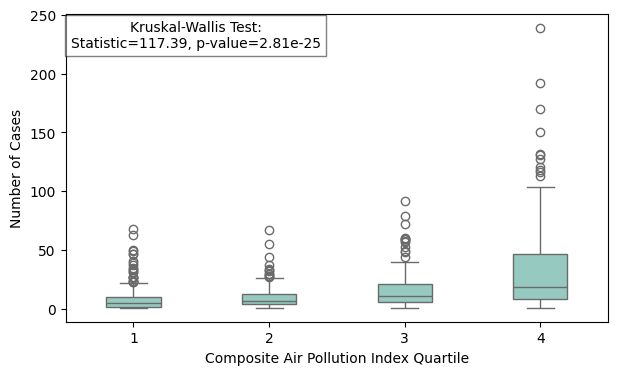

In [65]:
# Kruskal-Wallis test result
kw_stat = 117.39
kw_pvalue = 2.815e-25

# Create box plots to visualize the distribution of cases within each quartile
plt.figure(figsize=(7, 4))
ax= sns.boxplot(x='composite_air_pollution_index_quartile', y='num_cases', data=environment_data,width=0.4)
# Annotate Kruskal-Wallis test result
ax.text(0.24, 0.93, f'Kruskal-Wallis Test:\nStatistic={kw_stat:.2f}, p-value={kw_pvalue:.2e}',
        ha='center', va='center', transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
#plt.title('Number of Cases across Composite Air Pollution Index Quartiles')
plt.xlabel('Composite Air Pollution Index Quartile')
plt.ylabel('Number of Cases')
#plt.savefig("capi_cases_boxplot.png")

# Choropleth map

In [66]:
data_to_plot = environment_data[['patient_zip3','state','composite_air_pollution_index','num_cases']]
data_to_plot['patient_zip3']=data_to_plot['patient_zip3'].astype("str")

# merge two data based on shared variable
data_to_plot_shapes = data_to_plot.merge(new_shapes,left_on="patient_zip3",right_on='zip3_codes',how='right')
data_to_plot_shapes
# converting the data into geodataframe
geo_env_data = gpd.GeoDataFrame(data_to_plot_shapes,geometry='geometry')

In [67]:
num_cases_zip = geo_env_data[['num_cases','zip3_codes','geometry']]

Text(0.5, 1.0, 'Number of breast cancer cases by air pollution index')

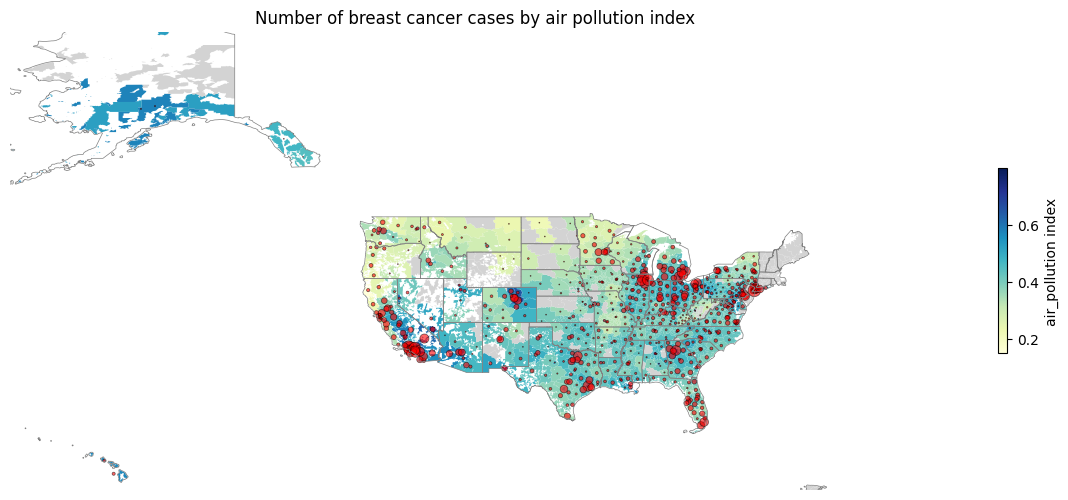

In [68]:
# Plotting the choropleth map
fig, ax = plt.subplots(1, 1,figsize=(15,6))
geo_env_data.plot(column='composite_air_pollution_index', ax=ax,
                  legend=True,
                  missing_kwds={"color": "lightgrey" },cmap='YlGnBu',
                  legend_kwds={'label': "air_pollution index",'orientation': "vertical",'shrink': 0.4})

# Add state boundaries
state_shapes.boundary.plot(ax=ax, edgecolor='grey', linewidth=0.5)

# Extract centroids from geometries
geo_env_data['centroid'] = geo_env_data['geometry'].centroid
geo_env_data['longitude'] = geo_env_data['centroid'].x
geo_env_data['latitude'] = geo_env_data['centroid'].y

sizes = geo_env_data['num_cases'] / geo_env_data['num_cases'].max() * 100  # Normalize sizes for better visualization

ax.scatter(geo_env_data['longitude'], geo_env_data['latitude'],
           s=sizes,  # Size of points
           c='red',  # Color of points
           alpha=0.6,  # Transparency
           edgecolor='k',  # Edge color
           linewidth=0.5,  # Edge thickness
           label='Number of early cases')

ax.set_axis_off()
ax.set_xlim(-170, -50)
ax.set_ylim(18,70)
plt.title('Number of breast cancer cases by air pollution index')

#plt.savefig("choropleth.png")